# <center>**LIMPIEZA_Y_EDA**<center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from scipy.stats import uniform
import pickle
np.random.seed(0)

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv('../data/Raw/phishing_Legitimate_full.csv').set_index('id')
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [3]:
df2=df.copy()
df.drop(columns=['NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT'],inplace=True)
df2

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0


In [4]:
df2.to_csv('../data/Raw/dataset_original.csv')

---

In [5]:
df2.isna().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [6]:
df.nunique()

NumDots                17
SubdomainLevel         13
PathLevel              18
UrlLength             226
NumDash                25
NumDashInHostname      10
AtSymbol                2
TildeSymbol             2
NumUnderscore          16
NumPercent             14
NumQueryComponents     19
NumAmpersand           16
NumHash                 2
NumNumericChars        82
NoHttps                 2
RandomString            2
IpAddress               2
DomainInSubdomains      2
DomainInPaths           2
HttpsInHostname         1
HostnameLength         74
PathLength            147
QueryLength           164
DoubleSlashInPath       2
CLASS_LABEL             2
dtype: int64

Atendiendo a los valores únicos, la columna HttpsInHostname solo tiene un valor (ninguna URL analizada incluían 'https' en el dominio), por lo que no tiene ninguna utilidad y saldrá en el EDA.

Por costumbre, quiero elaborar un pairplot para que me muestre las distribuciones y correlaciones de todas las variables, pero debido al tamaño y el numero de variables consume demasiado tiempo su elaboracion, por lo que tengo que hacelo sobre un 10% aleatorio de registros del dataset fraccionado.

In [7]:
df_10 = df.sample(frac=0.1, random_state=42) 
#sns.pairplot(df_10)


Para mostrar las distribuciones, puesto que el pairplot se demora en exceso, voy a hacer un bucle para mostrar Histogramas de las variables continuas y Diagramas de Barras para las discretas.

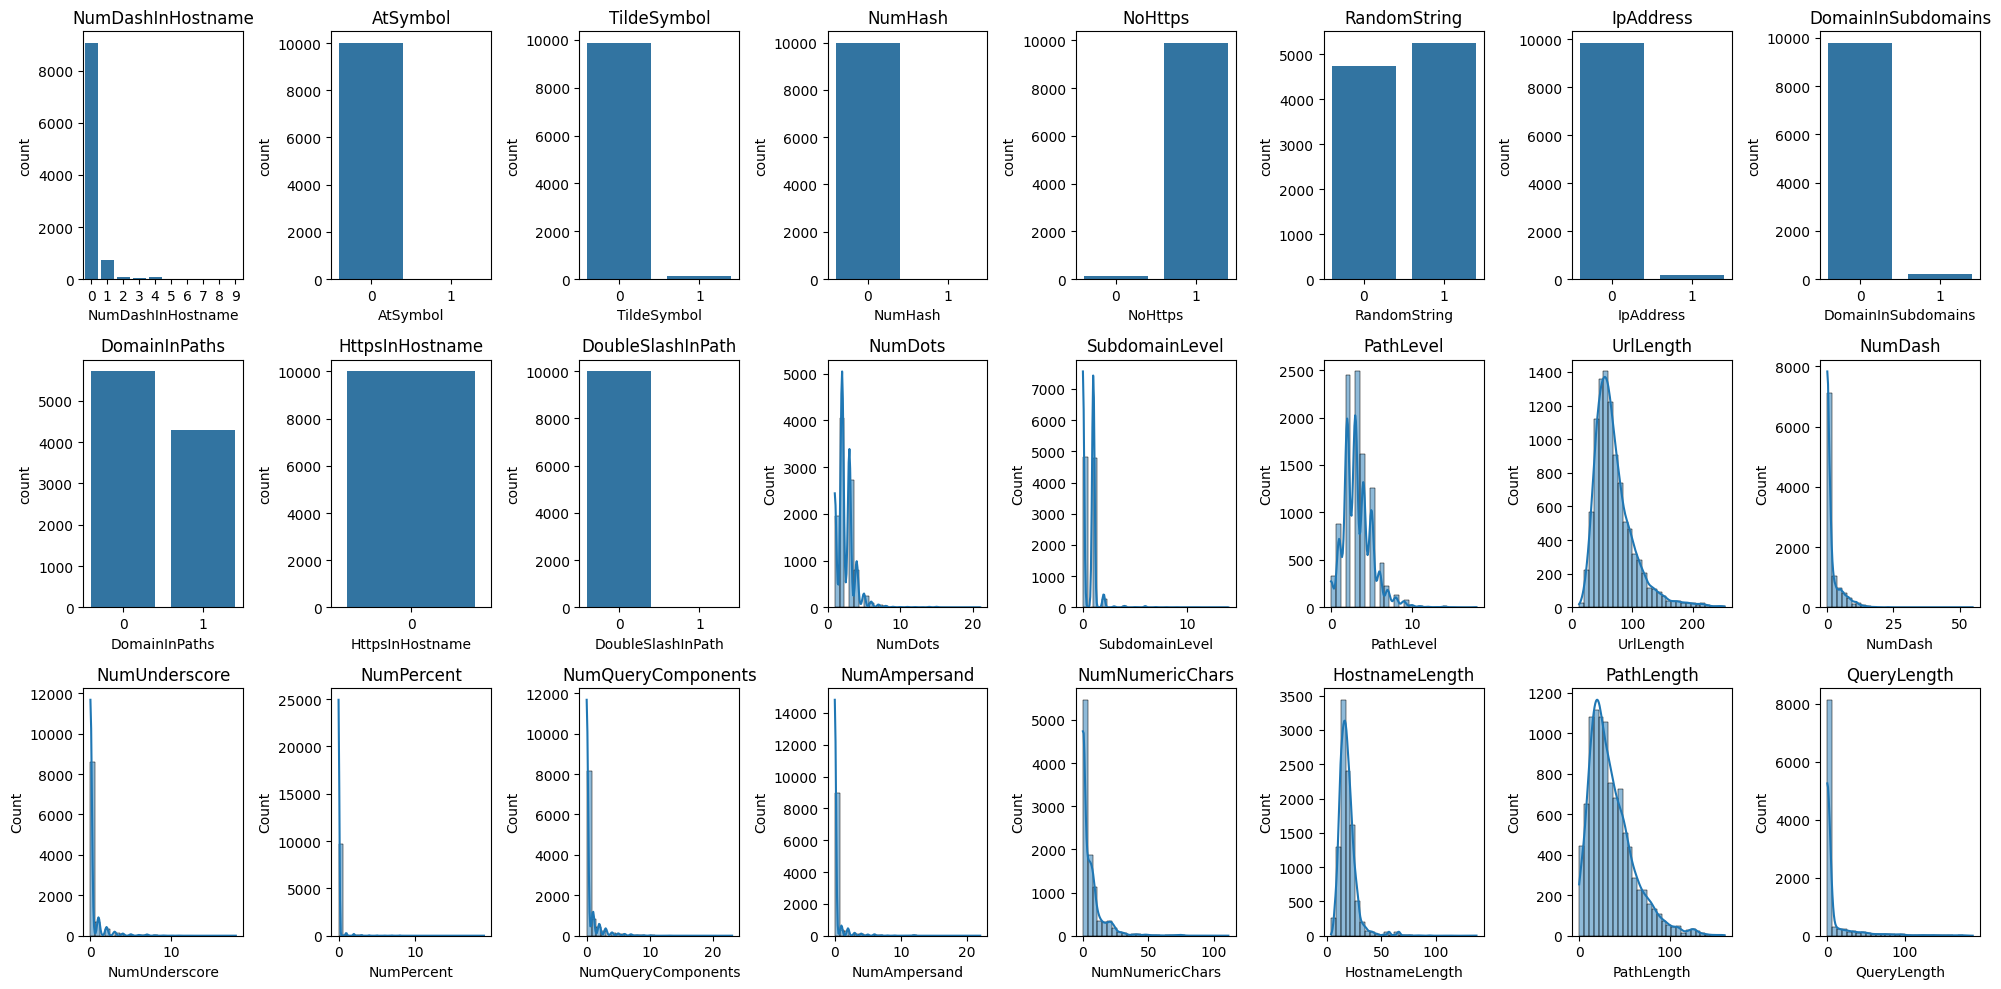

In [8]:
df3=df.drop(columns=['CLASS_LABEL'])
discretas = [col for col in df3.columns if df3[col].nunique() <= 10]
continuas = [col for col in df3.columns if df3[col].nunique() > 10]
plt.figure(figsize=(20, 10)) 

# Barras para variables discretas
for i, col in enumerate(discretas, 1):
    plt.subplot(3,8, i)
    sns.countplot(x=col, data=df3)  
    plt.title(f'{col}') 

# Histplot para variables continuas
for j, col in enumerate(continuas, len(discretas) + 1):
    plt.subplot(3,8, j)
    sns.histplot(df3[col], kde=True, bins=30)  
    plt.title(f'{col}')  

plt.tight_layout()  
plt.show()

Lo propio con la variable mas importante, el TARGET que define si el registro es o no un enlace peligroso.

/var/folders/3z/73lxqgp11kb61sfk787_46800000gn/T/ipykernel_81807/1067439746.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


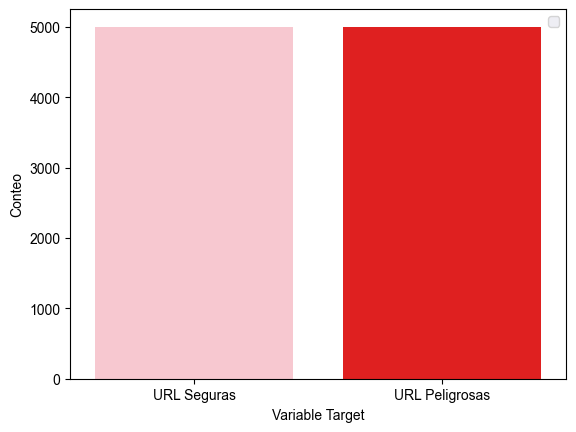

In [9]:
sns.countplot(x='CLASS_LABEL', data=df,hue='CLASS_LABEL',palette=['pink','red'],legend=False) 
plt.ylabel('Conteo')
sns.set_style('darkgrid')
plt.xlabel('Variable Target')
plt.legend()
plt.xticks([0, 1], ['URL Seguras', 'URL Peligrosas']);


In [10]:
df['CLASS_LABEL'].value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

Que la variable target esté así de equilibrada es otra señal de que el CSV estaba perfectamente estructurado para ML.

Atendiendo al número de valores únicos que tiene cada columna, no merece la pena analizar los outliers de todas, sino unicamente de las que tienen, por ejemplo, mas de 10 valores diferentes. Eso trato de hacer en la siguiente celda.

In [11]:
df.nunique()[df.nunique()>=10].index

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars',
       'HostnameLength', 'PathLength', 'QueryLength'],
      dtype='object')

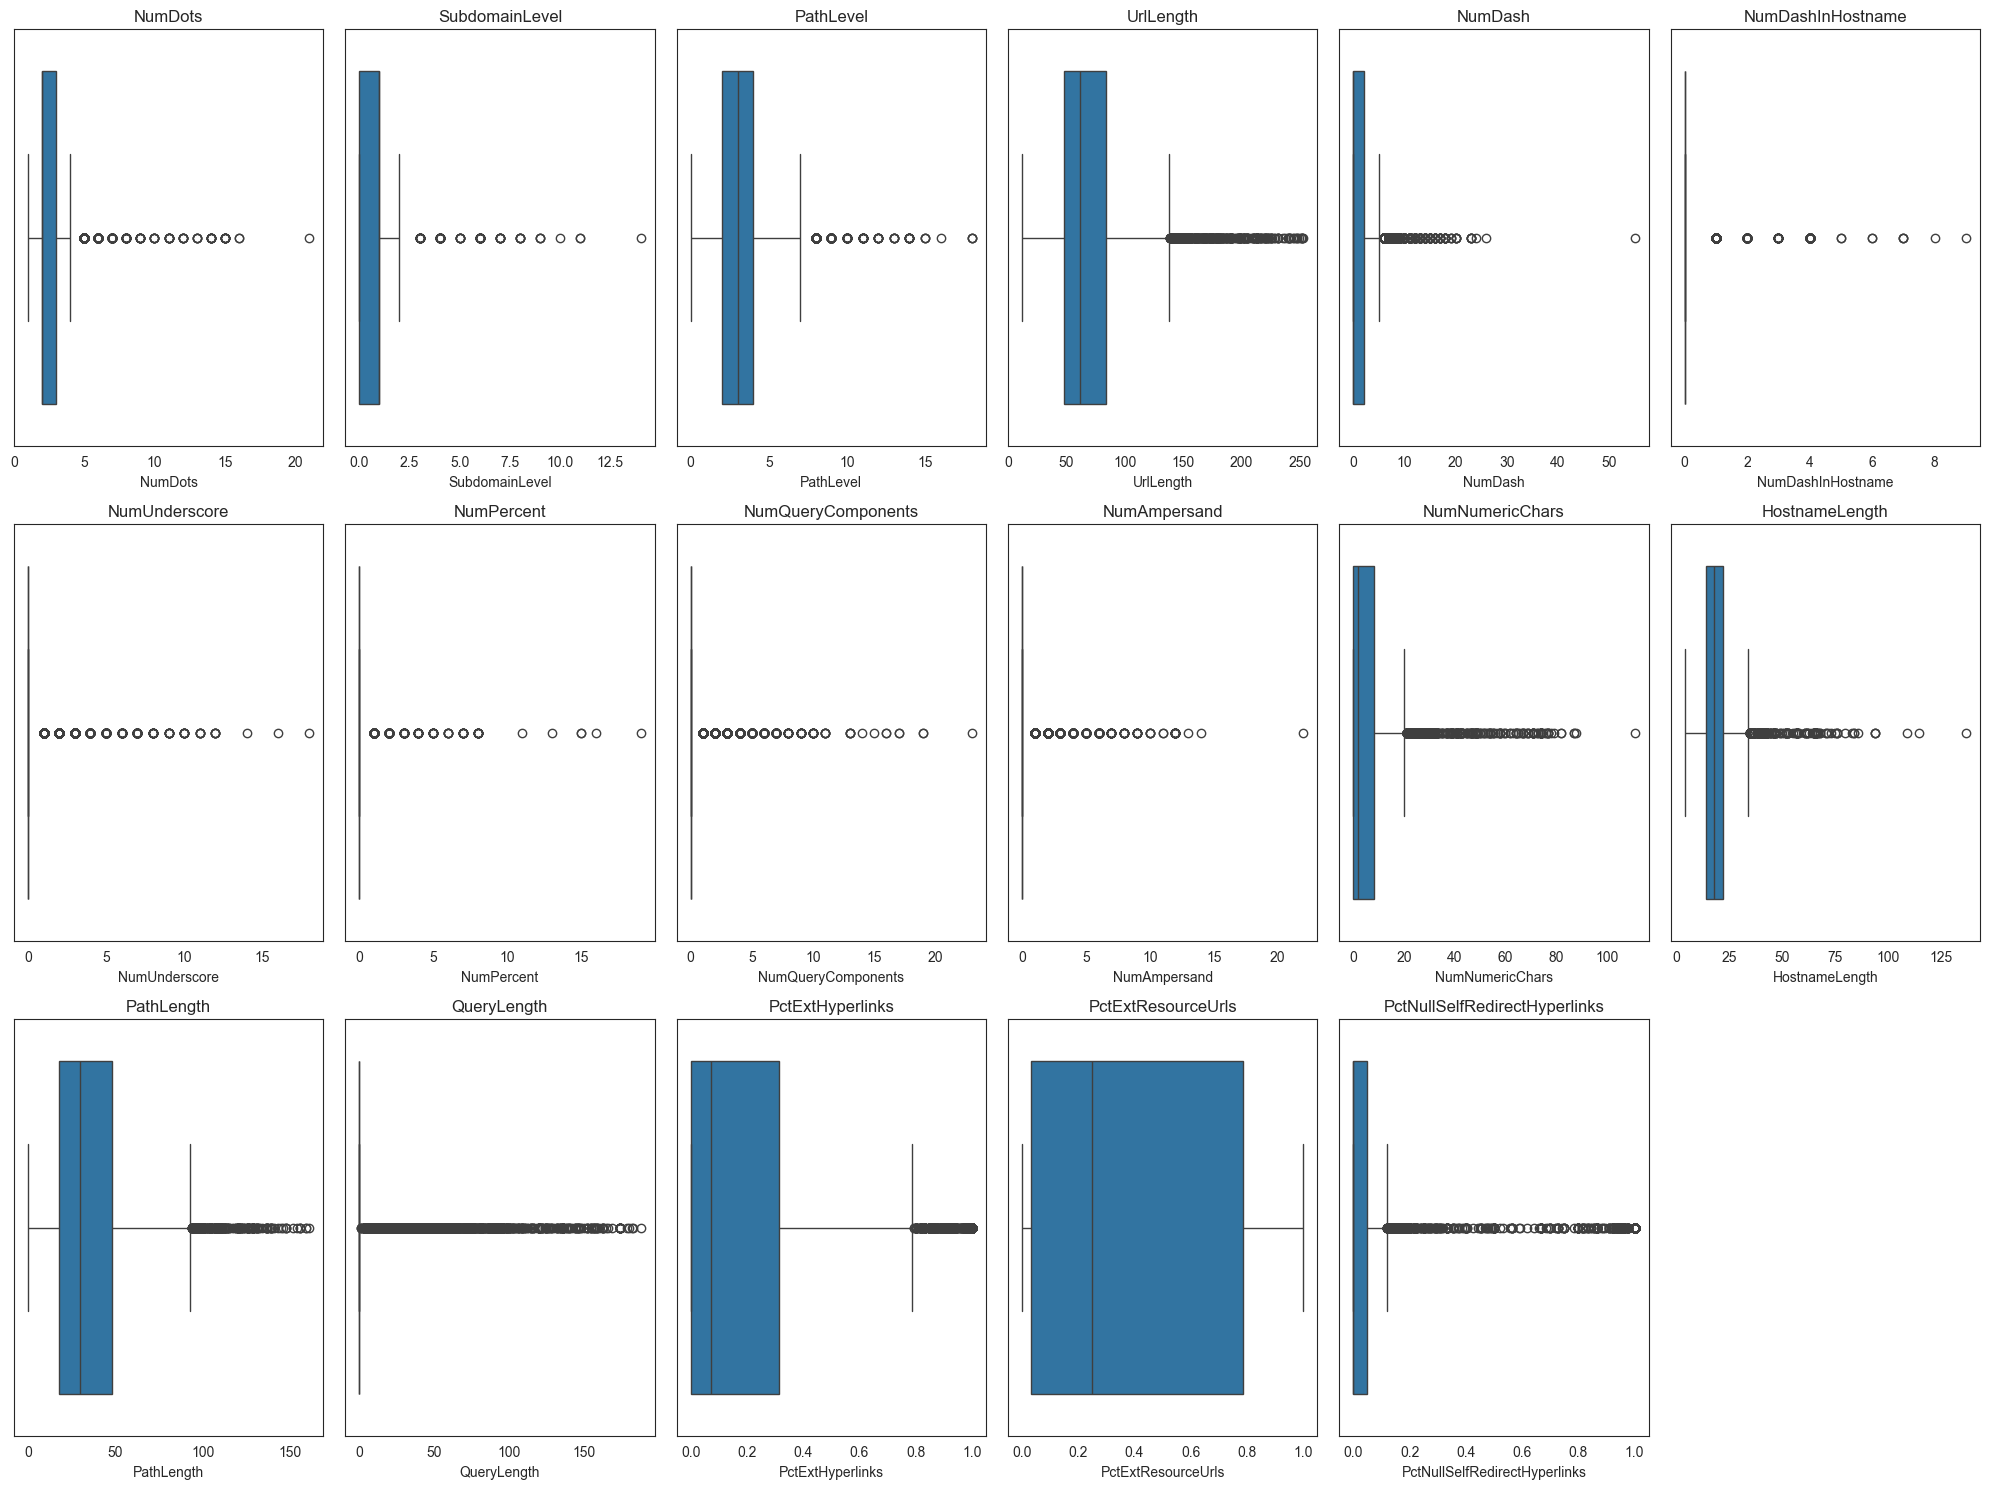

In [12]:
colboxplot= ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'NumUnderscore', 'NumPercent',
       'NumQueryComponents', 'NumAmpersand', 'NumNumericChars',
       'HostnameLength', 'PathLength', 'QueryLength', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']

plt.figure(figsize=(20, 15))
sns.set_style('white')
for i, col in enumerate(colboxplot, 1):
    plt.subplot(3,6,i)
    sns.boxplot(x=df2[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Como esperaba, ningúna variable con valores anómalos o mal distribuidos.

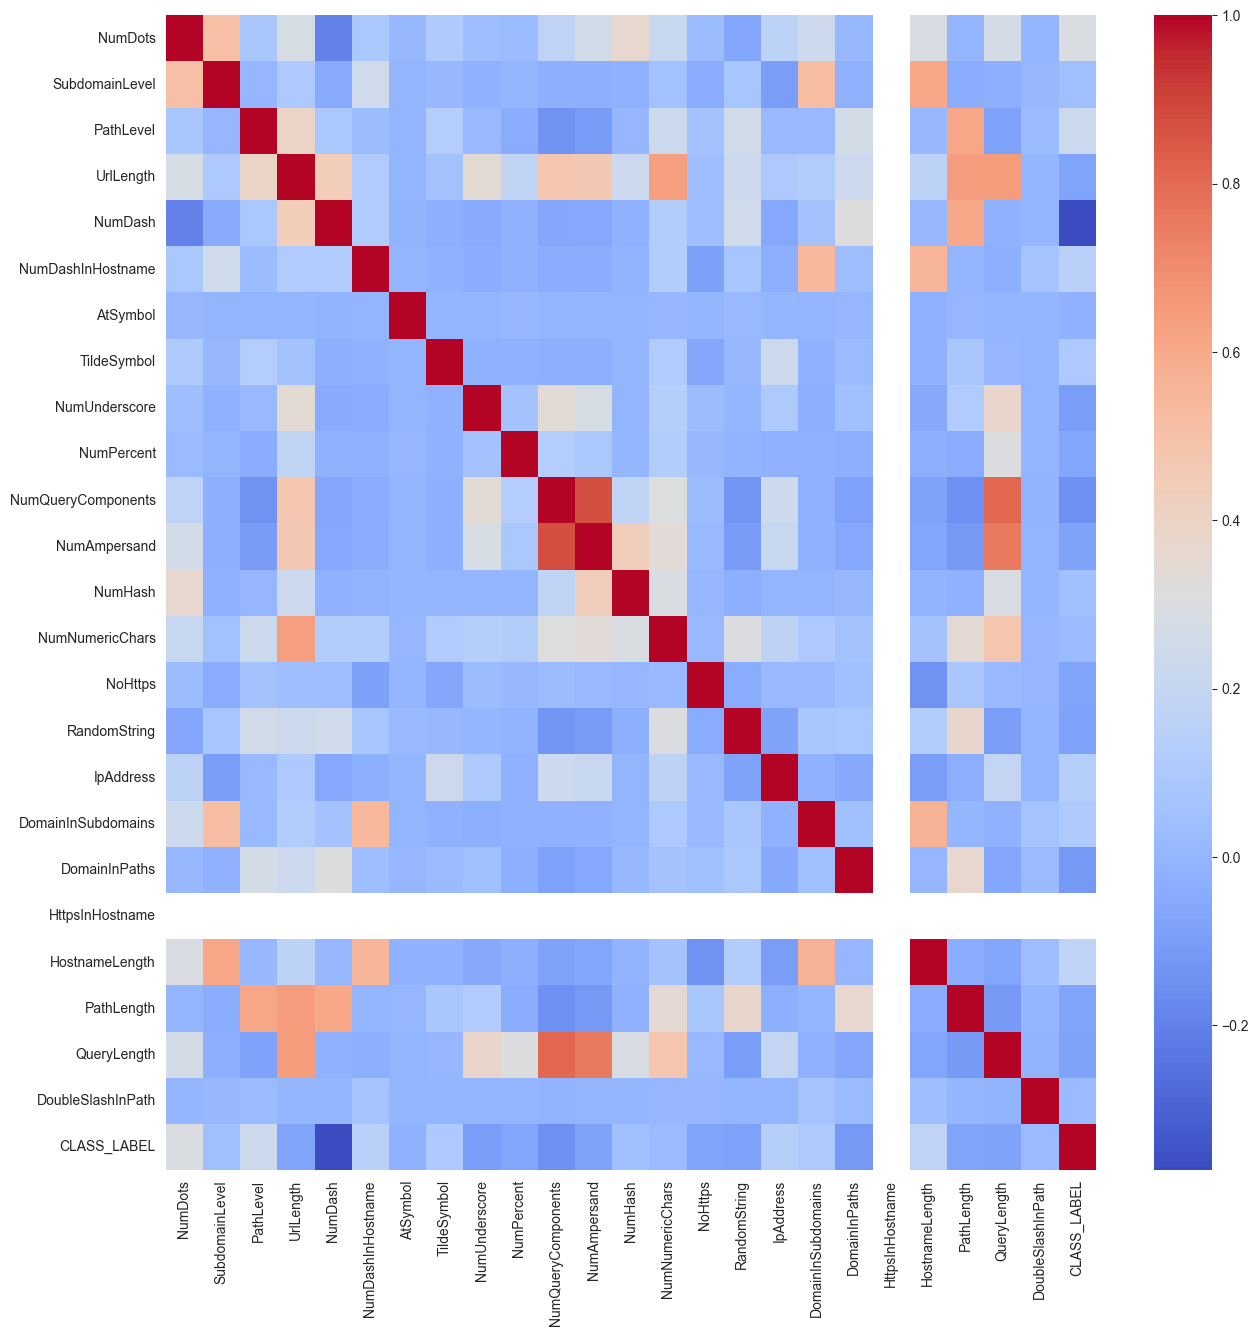

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

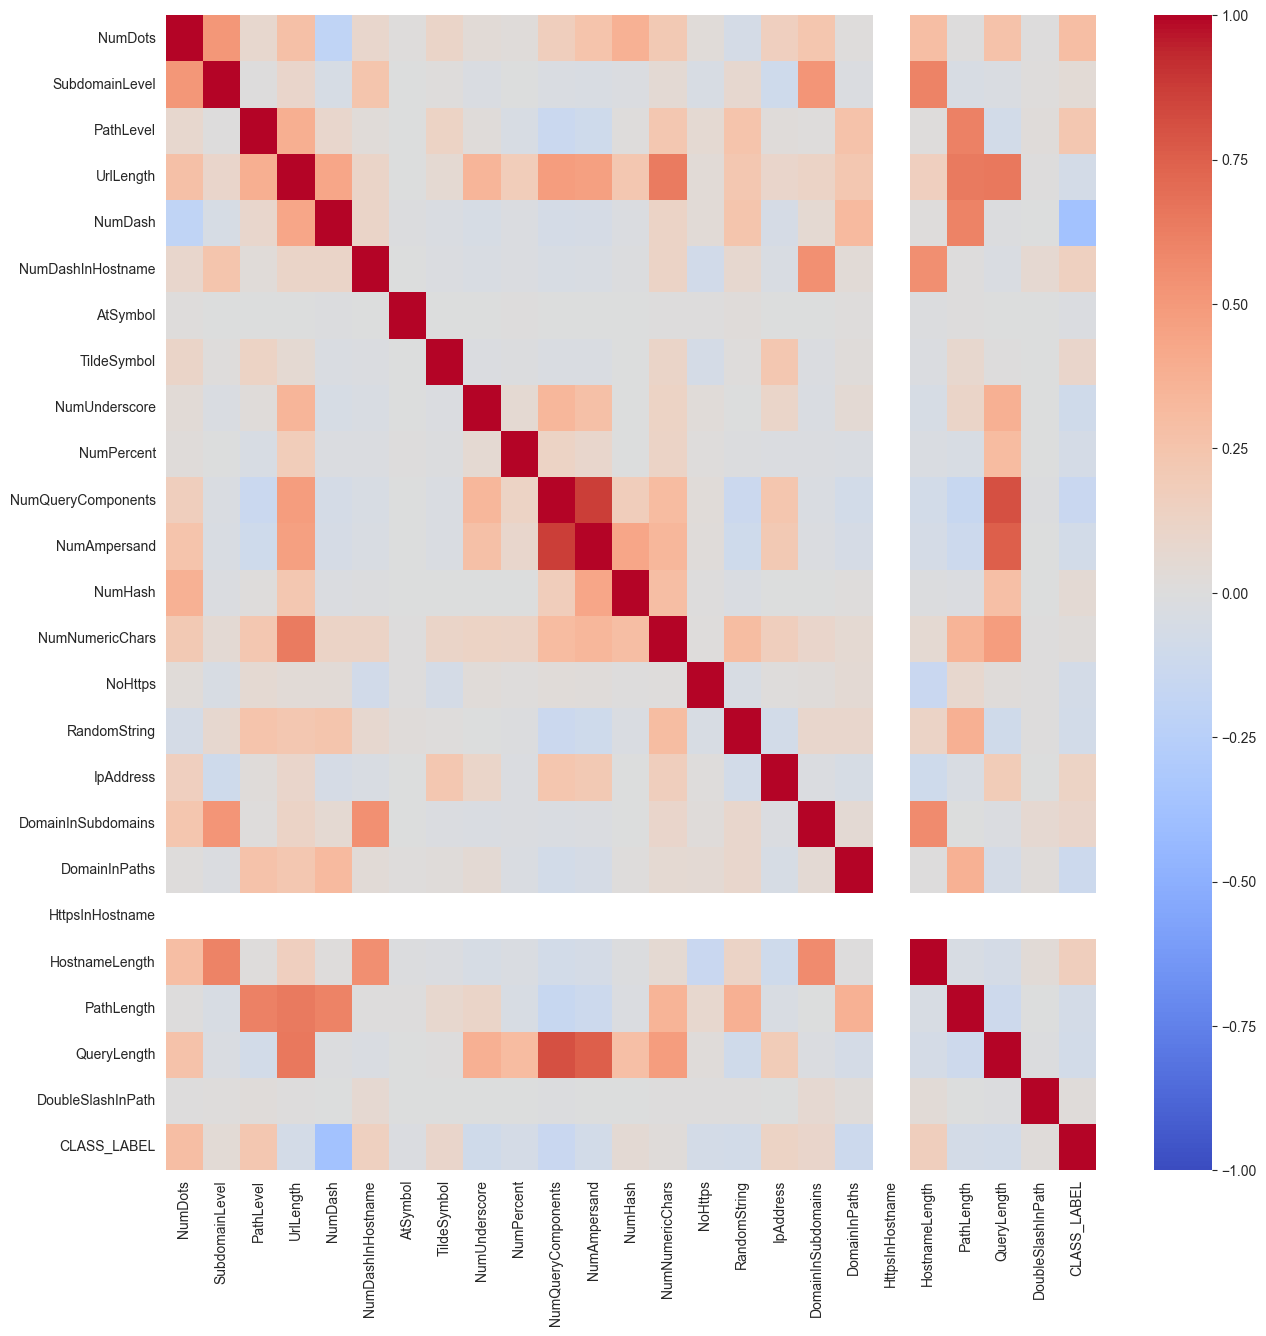

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap='coolwarm',vmin=(-1))
plt.show()

In [15]:
pd.set_option('display.max_columns', None)
df.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,NaN,0.289482,0.000579,0.263039,0.002462,0.294111
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,NaN,0.605218,-0.039307,-0.026179,0.012070,0.043132
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,NaN,0.013025,0.612786,-0.085555,0.020221,0.229450
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,NaN,0.162770,0.643924,0.649204,0.000162,-0.074493
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,NaN,0.010045,0.605889,-0.013725,-0.001462,-0.372235
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,NaN,0.550247,0.000450,-0.029753,0.065692,0.150444
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,-0.005908,-0.004298,-0.000832,0.004545,0.001844,0.016471,-0.002292,-0.002610,0.008322,NaN,-0.013143,0.005943,-0.006132,-0.000520,-0.017323
TildeSymbol,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,-0.013665,-0.024903,-0.026223,-0.005532,0.111735,-0.062954,0.009156,0.228278,-0.017360,0.019217,NaN,-0.021237,0.082378,0.003963,-0.003458,0.095864
NumUnderscore,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,0.061638,0.343520,0.279688,-0.002685,0.131965,0.027451,-0.001518,0.101720,-0.029686,0.049452,NaN,-0.053946,0.113097,0.380857,-0.005711,-0.098869
NumPercent,0.022616,-0.006003,-0.043529,0.184947,-0.017938,-0.021648,0.007226,-0.013665,0.061638,1.000000,0.129980,0.089819,-0.002340,0.121789,0.012623,-0.009526,-0.015691,-0.016781,-0.030047,NaN,-0.026739,-0.044664,0.305399,-0.003560,-0.068465


In [16]:
df.corr()["CLASS_LABEL"].sort_values(ascending=False,key=abs)

CLASS_LABEL           1.000000
NumDash              -0.372235
NumDots               0.294111
PathLevel             0.229450
HostnameLength        0.169157
NumDashInHostname     0.150444
NumQueryComponents   -0.147391
IpAddress             0.132291
DomainInPaths        -0.118201
DomainInSubdomains    0.100452
NumUnderscore        -0.098869
TildeSymbol           0.095864
RandomString         -0.085308
NumAmpersand         -0.081446
QueryLength          -0.080525
PathLength           -0.076125
UrlLength            -0.074493
NoHttps              -0.072219
NumPercent           -0.068465
NumHash               0.048014
SubdomainLevel        0.043132
DoubleSlashInPath     0.023344
NumNumericChars       0.019122
AtSymbol             -0.017323
HttpsInHostname            NaN
Name: CLASS_LABEL, dtype: float64

---

## 3.1 FEATURE ENGINEERING

Se crean nuevas variables y se transforman las existentes para mejorar el rendimiento del modelo. El csv está limpio y preparado para un Modelo, pero para tratar de obtener variables mas útiles e interesantes para el desarrollo del modelo, resulta adecuado probar algunas manipulaciones y combinaciones de las variables existentes.

In [17]:
#Borramos la variable que solo tiene un valor
df.drop(columns=['HttpsInHostname'],inplace=True)
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL
id,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,21,44,0,0,1
2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,17,16,103,0,1
3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,27,24,0,0,1
4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,22,50,0,0,1
5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,10,29,0,0,1


In [18]:
# Sumar los caracteres especiales y otra con un ratio de ellos respecto a la longitud del url
df['SpecialChars'] = df['NumDots'] + df['NumDash'] + df['NumUnderscore']
df['SpecialCharRatio'] = df['SpecialChars'] / df['UrlLength']
print(df[['SpecialChars','SpecialCharRatio']].nunique())
print("---\n",df[['SpecialChars','SpecialCharRatio']].value_counts())

SpecialChars         27
SpecialCharRatio    903
dtype: int64
---
 SpecialChars  SpecialCharRatio
3             0.063830            85
2             0.046512            83
              0.041667            73
3             0.060000            73
              0.058824            71
                                  ..
1             0.008333             1
              0.007752             1
              0.007576             1
              0.007246             1
              0.006024             1
Name: count, Length: 1407, dtype: int64


In [19]:
df['PctNumerics'] = df['NumNumericChars'] / df['UrlLength']
# Un ratio de caracteres numéricos en la URL respecto a la longitud
df['PctNumerics'].nunique()

1495

In [20]:
#Ratio de caracteres especiales en el nombre del host.
# Esta he tenido que buscar como hacerla bien, y claro cada subdominio se separa por puntos por lo que el numero de niveles es el numero de puntos en el Host
df['SCHostRatio'] = (df['NumDashInHostname'] + df['SubdomainLevel']) / df['HostnameLength'].replace(0,1) #El replace por si acaso hay algun HostnameLength de 0
df['SCHostRatio'].value_counts()

SCHostRatio
0.000000    4487
0.055556     387
0.058824     383
0.052632     371
0.050000     351
            ... 
0.102564       1
0.075000       1
0.113208       1
0.073171       1
0.078947       1
Name: count, Length: 122, dtype: int64

In [21]:
# Ratio de la longitud del dominio respecto de todo el enlace
df['HostnameRatio'] = df['HostnameLength'] / df['UrlLength']
df[['HostnameLength','UrlLength','HostnameRatio']]

,HostnameLength,UrlLength,HostnameRatio
id,,,
1,21,72,0.291667
2,17,144,0.118056
3,27,58,0.465517
4,22,79,0.278481
5,10,46,0.217391
...,...,...,...
9996,15,50,0.300000
9997,19,59,0.322034
9998,16,57,0.280702


In [22]:
#Suma de los principales elementos sospechosos binarios (pese a que tambien son útiles, no tendria sentido sumar aqui variables de 'length' o que tengan valores no binarios)
df['SuspiciousElements'] = df['IpAddress'] + df['NoHttps'] + df['DomainInPaths'] + df['DomainInSubdomains'] + df['DoubleSlashInPath']
df['SuspiciousElements'].value_counts()

SuspiciousElements
1    5420
2    4313
3     174
0      90
4       3
Name: count, dtype: int64

In [23]:
#Longitud promedio de la ruta según el nivel 
df['AvgPathLength'] = df['PathLength'] / df['PathLevel'].replace(0, 1)
#De nuevo, el replace lo he tenido que añadir porque hay alguna que es 0 y me crea infinitos que no puedo analizar en el modelo
df[['PathLength','PathLevel','AvgPathLength']].head()

,PathLength,PathLevel,AvgPathLength
id,,,
1,44,5,8.800000
2,16,3,5.333333
3,24,2,12.000000
4,50,6,8.333333
5,29,4,7.250000


In [24]:
#Ratio de parametros 
df['QueryRatio'] = df['NumQueryComponents'] / df['QueryLength'].replace(0, 1)
df[['NumQueryComponents','QueryLength','QueryRatio']].tail()

,NumQueryComponents,QueryLength,QueryRatio
id,,,
9996,2,17,0.117647
9997,0,0,0.000000
9998,0,0,0.000000
9999,1,13,0.076923
10000,0,0,0.000000


In [25]:
#Logaritmizar las tres variables de las que hay valores extensamente distribuidos (desde menos de 10 a mas de 100)
df['log_UrlLength'] = np.log1p(df['UrlLength'])
df['log_PathLength']=np.log1p(df['PathLength'])
df['log_Querylength']=np.log1p(df['QueryLength'])
df[['UrlLength','log_UrlLength','PathLength','log_PathLength','QueryLength','log_Querylength']]

,UrlLength,log_UrlLength,PathLength,log_PathLength,QueryLength,log_Querylength
id,,,,,,
1,72,4.290459,44,3.806662,0,0.000000
2,144,4.976734,16,2.833213,103,4.644391
3,58,4.077537,24,3.218876,0,0.000000
4,79,4.382027,50,3.931826,0,0.000000
5,46,3.850148,29,3.401197,0,0.000000
...,...,...,...,...,...,...
9996,50,3.931826,10,2.397895,17,2.890372
9997,59,4.094345,33,3.526361,0,0.000000
9998,57,4.060443,34,3.555348,0,0.000000


#### GUARDAR DATOS PROCESADOS

In [26]:
df.to_csv("../data/Processed/dataset_processed.csv")

## 3.2 EDA POST ENGINEERING
Tras las manipulaciones realizadas, cabe analizar rapidamente la distribucion de las nuevas variables, y sobre todo su correlación, especialmente con la variable objetivo y con las demás variables principales, para ver si merece la pena incluirlas en futuros modelos. 

In [27]:
df.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'CLASS_LABEL', 'SpecialChars',
       'SpecialCharRatio', 'PctNumerics', 'SCHostRatio', 'HostnameRatio',
       'SuspiciousElements', 'AvgPathLength', 'QueryRatio', 'log_UrlLength',
       'log_PathLength', 'log_Querylength'],
      dtype='object')

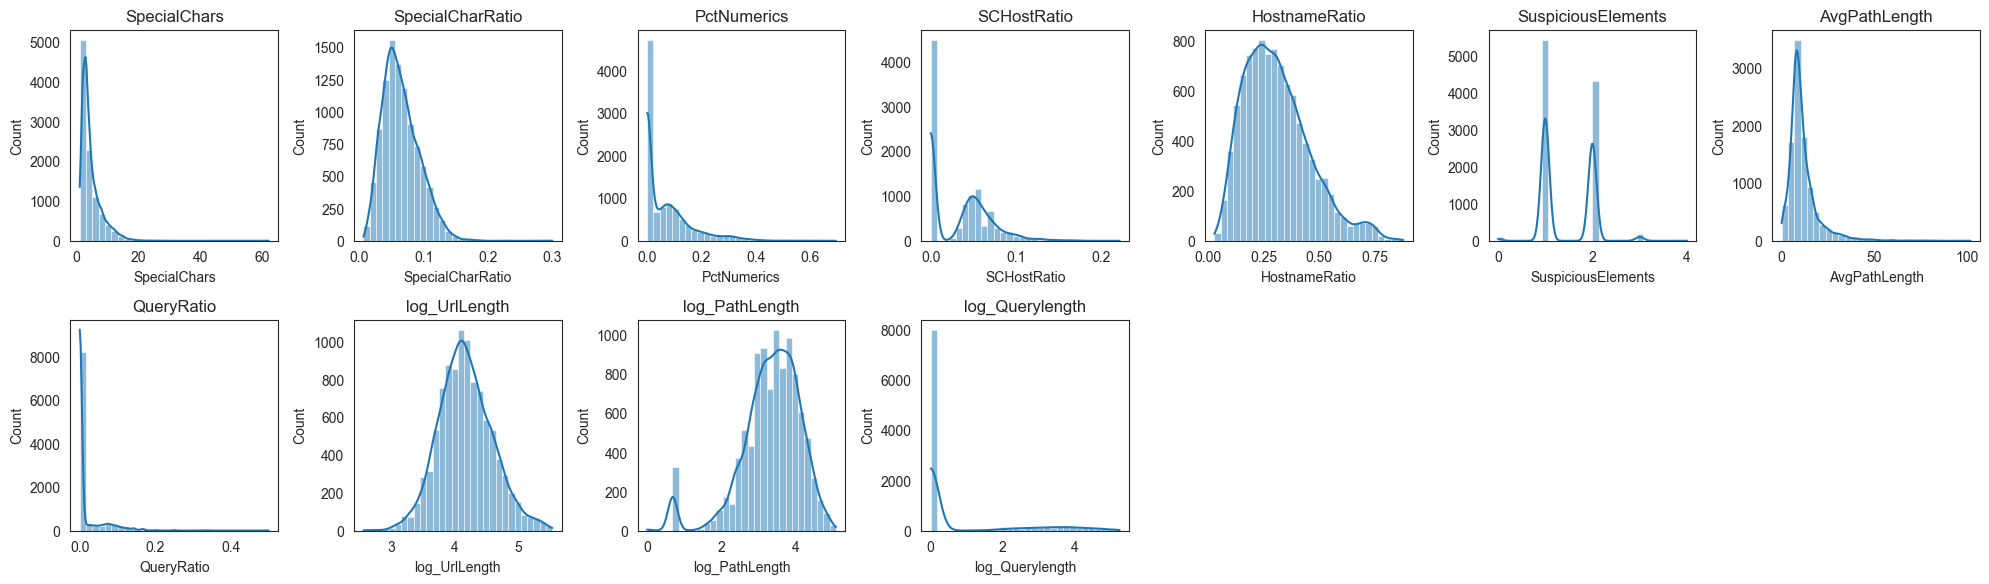

In [28]:
nuevascolumnas=['SpecialChars', 'SpecialCharRatio', 'PctNumerics',
       'SCHostRatio','HostnameRatio', 'SuspiciousElements',
       'AvgPathLength', 'QueryRatio', 'log_UrlLength', 'log_PathLength',
       'log_Querylength']
plt.figure(figsize=(20, 20))  # Ajusta el tamaño según la cantidad de variables
for i, col in enumerate(nuevascolumnas, 1):
    plt.subplot(7,7, i) 
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(col)  # Título con el nombre de la variable

plt.tight_layout()  # Ajusta los gráficos para que no se sobrepongan
plt.show()

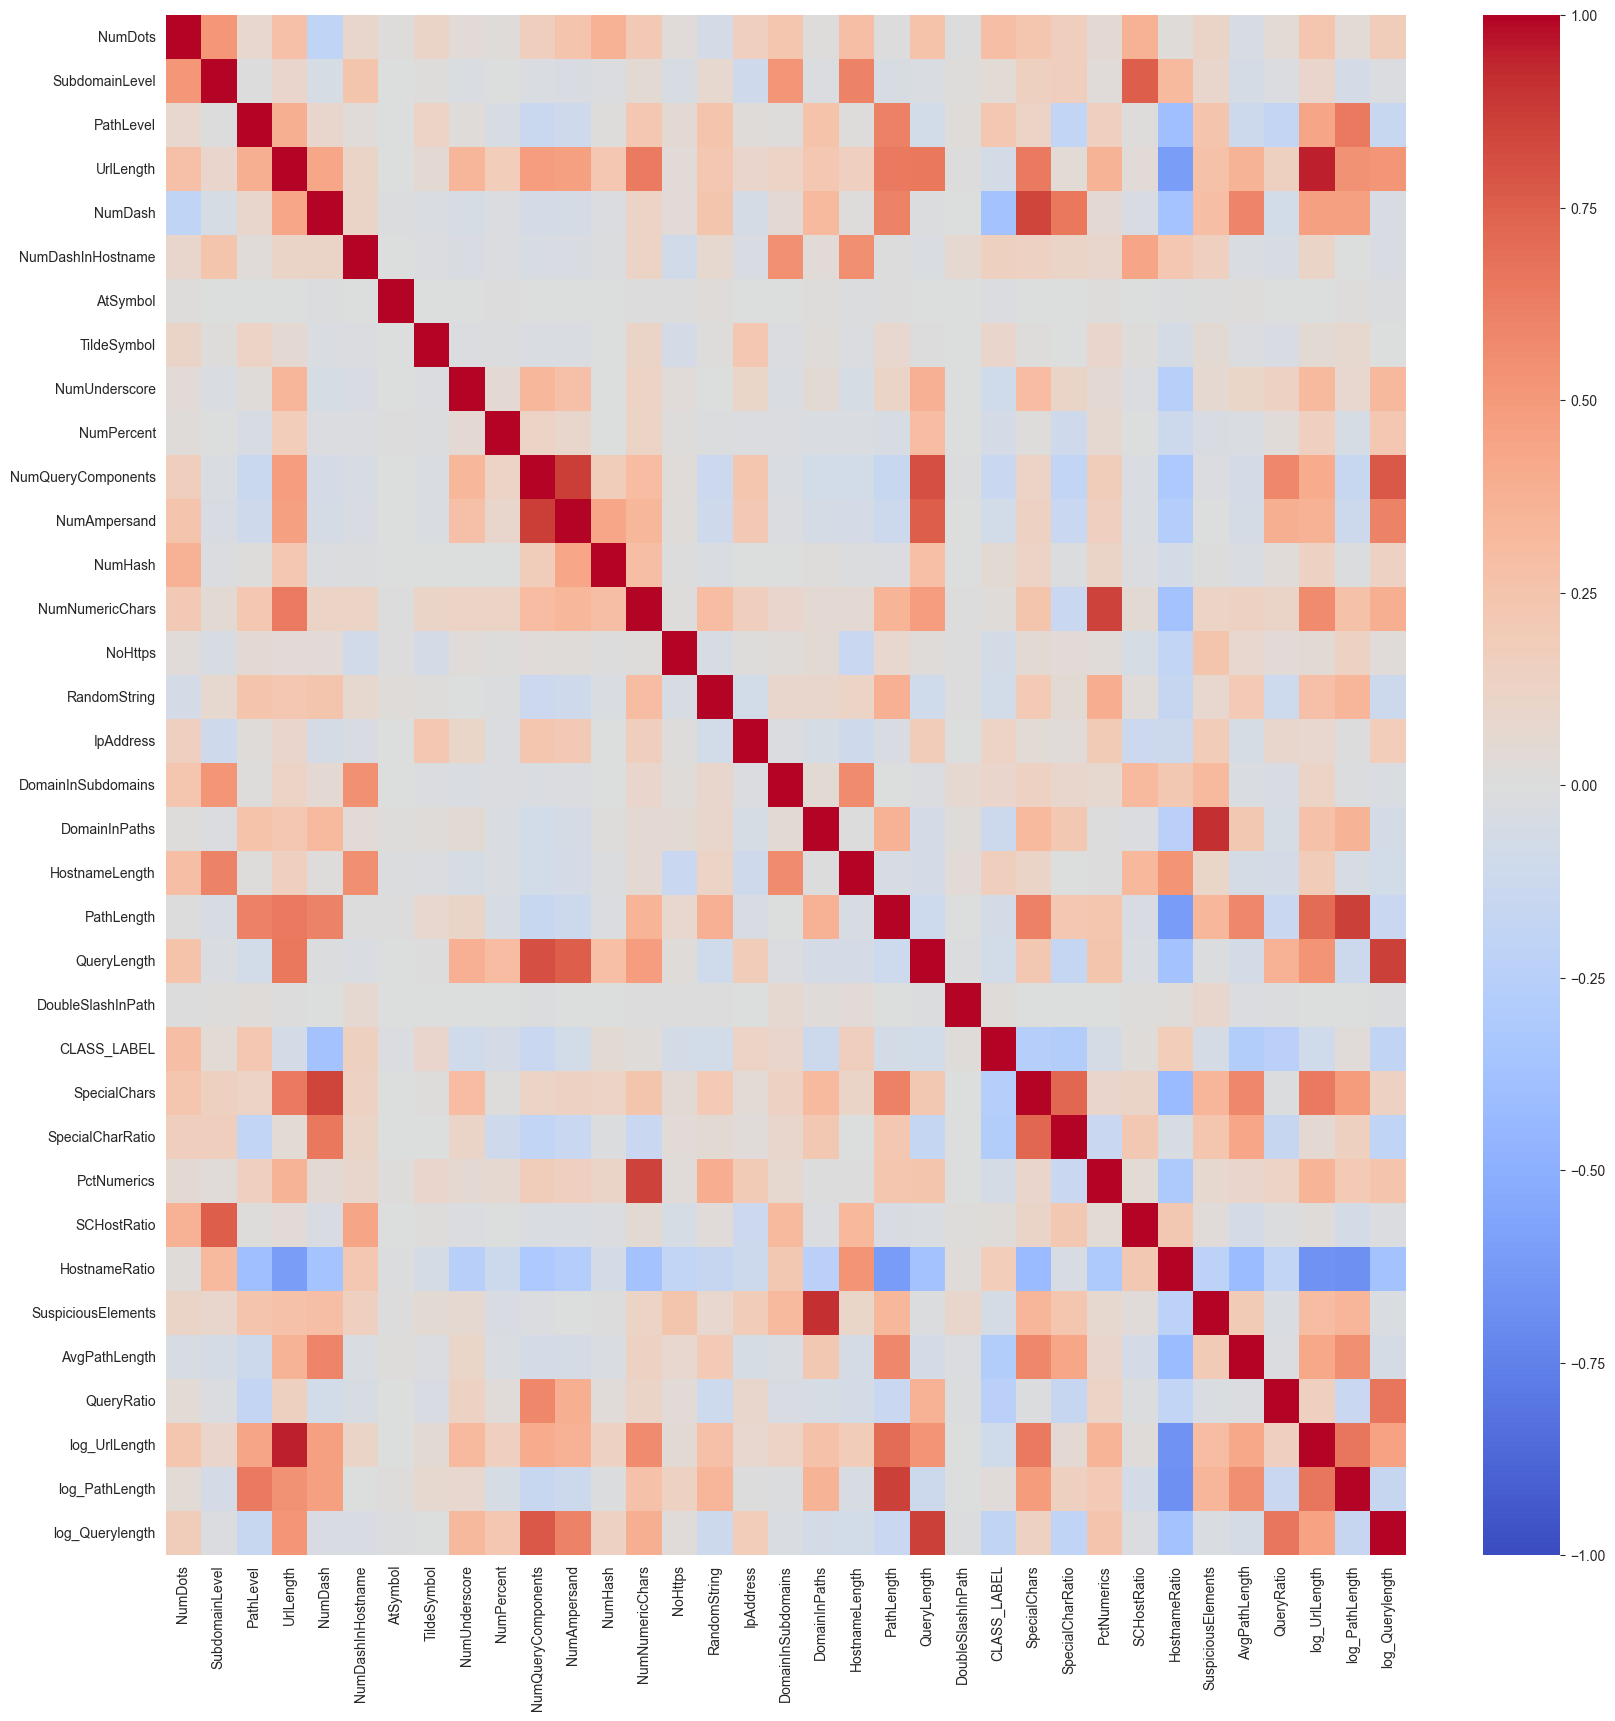

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',vmin=(-1))
plt.show()

In [30]:
pd.set_option('display.max_columns', None)
df.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,CLASS_LABEL,SpecialChars,SpecialCharRatio,PctNumerics,SCHostRatio,HostnameRatio,SuspiciousElements,AvgPathLength,QueryRatio,log_UrlLength,log_PathLength,log_Querylength
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,0.169283,0.255404,0.371642,0.211384,0.024590,-0.064631,0.158447,0.238473,0.009897,0.289482,0.000579,0.263039,0.002462,0.294111,0.234767,0.165992,0.060444,0.373405,0.019091,0.115019,-0.043576,0.043950,0.239617,0.043090,0.176404
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,-0.029706,-0.031766,-0.018054,0.051744,-0.044628,0.076544,-0.103343,0.522014,-0.019847,0.605218,-0.039307,-0.026179,0.012070,0.043132,0.152848,0.169440,0.030520,0.753912,0.319879,0.089617,-0.060938,-0.017132,0.096664,-0.069466,-0.019104
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,-0.140303,-0.104935,0.007947,0.233024,0.058466,0.250091,0.017895,0.014693,0.261468,0.013025,0.612786,-0.085555,0.020221,0.229450,0.123285,-0.180236,0.157872,0.011875,-0.397292,0.255596,-0.123087,-0.176694,0.442814,0.642680,-0.150950
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,0.476699,0.466038,0.227029,0.637872,0.036667,0.230698,0.094311,0.120201,0.227722,0.162770,0.643924,0.649204,0.000162,-0.074493,0.645734,0.042350,0.363578,0.034117,-0.603032,0.266287,0.360404,0.156043,0.953095,0.538175,0.515902
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,-0.064746,-0.056693,-0.023398,0.121830,0.036594,0.248141,-0.056135,0.056684,0.315989,0.010045,0.605889,-0.013725,-0.001462,-0.372235,0.846372,0.655251,0.056430,-0.031870,-0.365091,0.293017,0.596300,-0.083670,0.465136,0.465573,-0.038745
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,-0.042379,-0.036415,-0.008395,0.120447,-0.089577,0.073574,-0.033672,0.542477,0.038602,0.550247,0.000450,-0.029753,0.065692,0.150444,0.133142,0.112350,0.086219,0.443813,0.233623,0.158448,-0.027706,-0.043833,0.113824,-0.002871,-0.037639
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,-0.005908,-0.004298,-0.000832,0.004545,0.001844,0.016471,-0.002292,-0.002610,0.008322,-0.013143,0.005943,-0.006132,-0.000520,-0.017323,-0.006602,-0.007494,0.011063,-0.005667,-0.012201,0.006569,0.012199,-0.006827,-0.000581,0.009404,-0.008283
TildeSymbol,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,-0.013665,-0.024903,-0.026223,-0.005532,0.111735,-0.062954,0.009156,0.228278,-0.017360,0.019217,-0.021237,0.082378,0.003963,-0.003458,0.095864,0.014231,-0.006976,0.099325,0.014055,-0.054737,0.054341,-0.020493,-0.035939,0.050858,0.070623,-0.007112
NumUnderscore,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,0.061638,0.343520,0.279688,-0.002685,0.131965,0.027451,-0.001518,0.101720,-0.029686,0.049452,-0.053946,0.113097,0.380857,-0.005711,-0.098869,0.307211,0.110885,0.056002,-0.021168,-0.250183,0.065498,0.103170,0.141000,0.317144,0.084805,0.326633
NumPercent,0.022616,-0.006003,-0.043529,0.184947,-0.017938,-0.021648,0.007226,-0.013665,0.061638,1.000000,0.129980,0.089819,-0.002340,0.121789,0.012623,-0.009526,-0.015691,-0.016781,-0.030047,-0.026739,-0.044664,0.305399,-0.003560,-0.068465,0.013215,-0.102889,0.069650,-0.007459,-0.119460,-0.033003,-0.026677,0.028260,0.160281,-0.054679,0.227155


In [31]:
df.corr()["CLASS_LABEL"].sort_values(ascending=False,key=abs)

CLASS_LABEL           1.000000
NumDash              -0.372235
NumDots               0.294111
AvgPathLength        -0.276552
SpecialCharRatio     -0.273858
SpecialChars         -0.264729
QueryRatio           -0.239121
PathLevel             0.229450
log_Querylength      -0.191751
HostnameRatio         0.187061
HostnameLength        0.169157
NumDashInHostname     0.150444
NumQueryComponents   -0.147391
IpAddress             0.132291
DomainInPaths        -0.118201
DomainInSubdomains    0.100452
NumUnderscore        -0.098869
TildeSymbol           0.095864
log_UrlLength        -0.094081
RandomString         -0.085308
NumAmpersand         -0.081446
QueryLength          -0.080525
PathLength           -0.076125
UrlLength            -0.074493
NoHttps              -0.072219
NumPercent           -0.068465
SuspiciousElements   -0.060694
PctNumerics          -0.060444
NumHash               0.048014
SubdomainLevel        0.043132
log_PathLength        0.025494
DoubleSlashInPath     0.023344
SCHostRa